In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import numpy as np


In [2]:
# Final balanced veri setini yükle
df = pd.read_pickle("df_final_balanced.pkl")
print(df['attack_category'].value_counts())


attack_category
benign                        15000
web attack  brute force      15000
backdoor                      15000
worms                         15000
fuzzers                       15000
shellcode                     15000
generic                       15000
dos                           15000
exploits                      15000
reconnaissance                15000
heartbleed                    15000
dos goldeneye                 15000
dos hulk                      15000
dos slowhttptest              15000
dos slowloris                 15000
web attack  sql injection    15000
web attack  xss              15000
analysis                      15000
Name: count, dtype: int64


In [3]:
# Özellik ve etiket ayırımı
X = df.drop(columns=['attack_category'])
y = df['attack_category']

# Eğitim ve test setine böl
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")


X_train: (216000, 5), X_test: (54000, 5)


In [8]:
from sklearn.ensemble import RandomForestClassifier

# Daha sade bir model (ezberlemeyi azaltmak için)
model = RandomForestClassifier(
    n_estimators=50,     # ağaç sayısı azaltıldı
    max_depth=10,        # derinlik sınırı
    random_state=42
)

model.fit(X_train, y_train)
print(" Yeni sade model eğitildi.")


 Yeni sade model eğitildi.


In [9]:
# Tahmin al
y_pred = model.predict(X_test)

# Sınıflandırma raporu
print(" Classification Report:")
print(classification_report(y_test, y_pred))




 Classification Report:
                            precision    recall  f1-score   support

                  analysis       0.22      0.27      0.24      3000
                  backdoor       0.22      0.17      0.19      3000
                    benign       0.95      0.91      0.93      3000
                       dos       0.14      0.09      0.11      3000
             dos goldeneye       0.99      0.99      0.99      3000
                  dos hulk       0.97      0.97      0.97      3000
          dos slowhttptest       0.99      0.99      0.99      3000
             dos slowloris       0.99      0.97      0.98      3000
                  exploits       0.17      0.06      0.08      3000
                   fuzzers       0.16      0.09      0.11      3000
                   generic       0.20      0.10      0.13      3000
                heartbleed       1.00      1.00      1.00      3000
            reconnaissance       0.14      0.06      0.09      3000
                 shellc

 Confusion Matrix (ham):
[[ 817  273    0  183    0    0    0    0   52  134  103    0  100  516
     0    0    0  822]
 [ 452  501    0  222    0    0    0    0   93  167  105    0  114  528
     0    0    0  818]
 [   0    0 2730    0   15   72    8   33    0    0    0    0    0    0
    25  102   15    0]
 [ 367  286    0  271    0    0    0    0  166  217  203    0  215  457
     0    0    0  818]
 [   0    0    8    0 2975    5    3    1    0    0    0    0    0    0
     0    7    1    0]
 [   0    0   31    0    4 2902    0    3    0    0    0    0    0    0
     2   55    3    0]
 [   0    0   23    0    3    0 2967    6    0    0    0    0    0    0
     0    0    1    0]
 [   0    0   58    0    1    0   19 2918    0    0    0    0    0    0
     1    2    1    0]
 [ 358  261    0  290    0    0    0    0  169  250  198    0  203  461
     0    0    0  810]
 [ 368  220    0  261    0    0    0    0  133  267  214    0  200  477
     0    0    0  860]
 [ 370  247    0  246    

c:\Anaconda\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


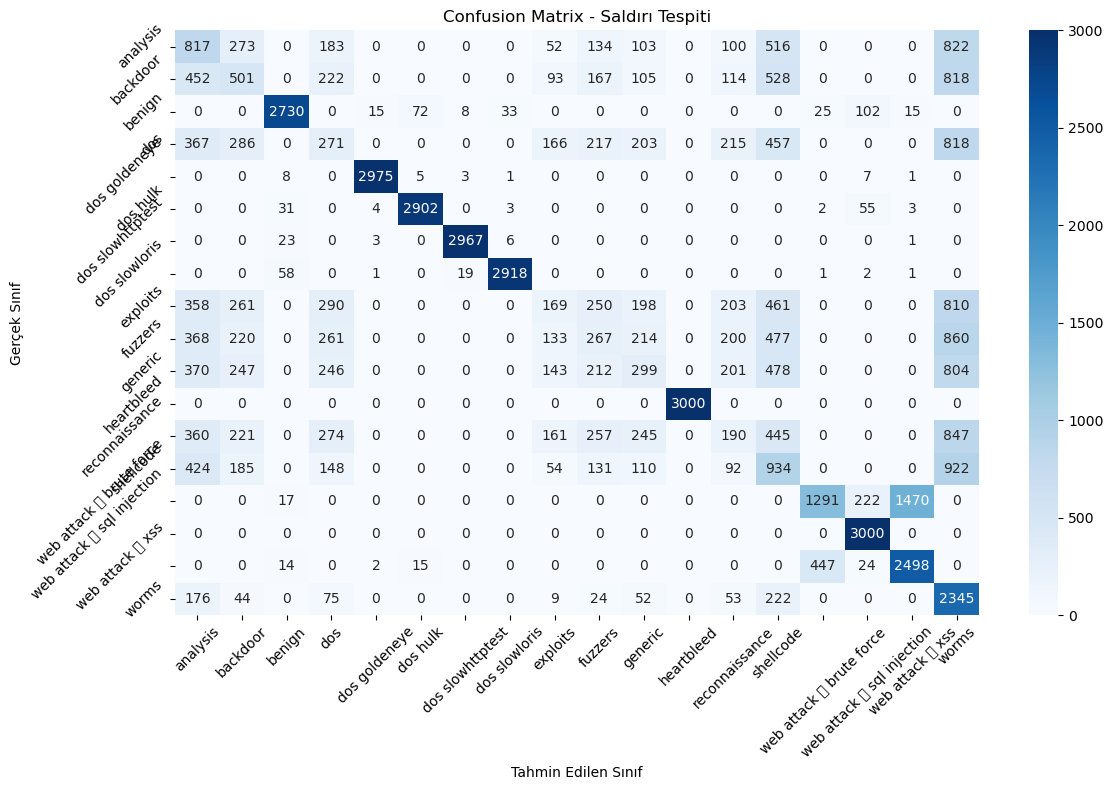

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Tahmin al
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = model.classes_

# Yazılı gösterim
print(" Confusion Matrix (ham):")
print(cm)

# Görsel (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Confusion Matrix - Saldırı Tespiti")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Örnek bir test girdisi
sample = X_test.iloc[0:1]
proba = model.predict_proba(sample)[0]
classes = model.classes_
predicted_class = model.predict(sample)[0]
threat_score = float(np.max(proba))

# Detaylı gösterim
print(" Threat Score'lar:")
for cls, score in zip(classes, proba):
    print(f"{cls:<15}: {score:.4f}")

print(f"\n Tahmin: {predicted_class}")
print(f" Threat Score: {threat_score:.4f}")


 Threat Score'lar:
analysis       : 0.0000
backdoor       : 0.0000
benign         : 0.7877
dos            : 0.0000
dos goldeneye  : 0.0194
dos hulk       : 0.0410
dos slowhttptest: 0.1033
dos slowloris  : 0.0427
exploits       : 0.0000
fuzzers        : 0.0000
generic        : 0.0000
heartbleed     : 0.0000
reconnaissance : 0.0000
shellcode      : 0.0000
web attack  brute force: 0.0013
web attack  sql injection: 0.0002
web attack  xss: 0.0044
worms          : 0.0000

 Tahmin: benign
 Threat Score: 0.7877


In [12]:
joblib.dump(model, "model_vpc.pkl")
print(" model_vpc.pkl başarıyla kaydedildi.")


 model_vpc.pkl başarıyla kaydedildi.
